In [103]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autograd import grad
from autograd import numpy as anp


In [104]:
ticker = 'NVDA'
data = yf.download(ticker, start="2018-01-01", end="2023-01-01")

# Selecionar a coluna de preços de fechamento ajustado
data = data[['Adj Close']].rename(columns={'Adj Close': 'Price'})

# Etapa 2: Preparação dos dados (divisão em treino e teste)
train_size = int(len(data) * 0.7)
train_data, test_data = data[:train_size], data[train_size:]

# Função para criar dados de série temporal para previsão
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Criar conjuntos de treino e teste
window_size = 5
X_train, y_train = create_dataset(train_data['Price'].values, window_size)
X_test, y_test = create_dataset(test_data['Price'].values, window_size)


[*********************100%***********************]  1 of 1 completed

In [105]:

# Etapa 3: Implementar a Regressão Linear com Descida de Gradiente
# Função de custo (MSE) e gradientes
def model(weights, X):
    return anp.dot(X, weights)

def mean_squared_error(weights, X, y):
    y_pred = model(weights, X)
    return anp.mean((y - y_pred) ** 2)

# Inicializar pesos e parâmetros de treinamento
weights = np.random.randn(window_size)
learning_rate = 0.01
epochs = 500
gradient = grad(mean_squared_error)


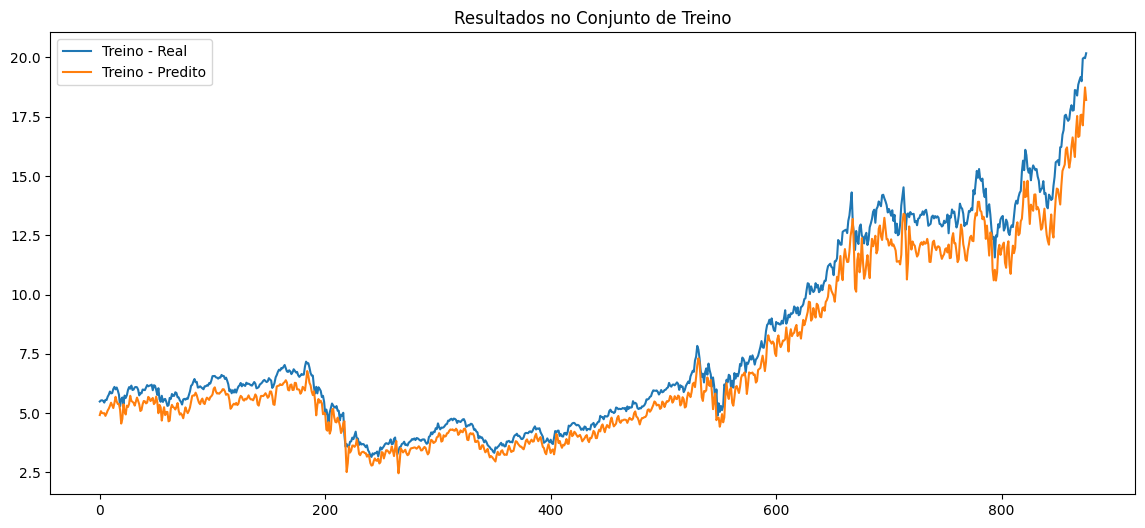

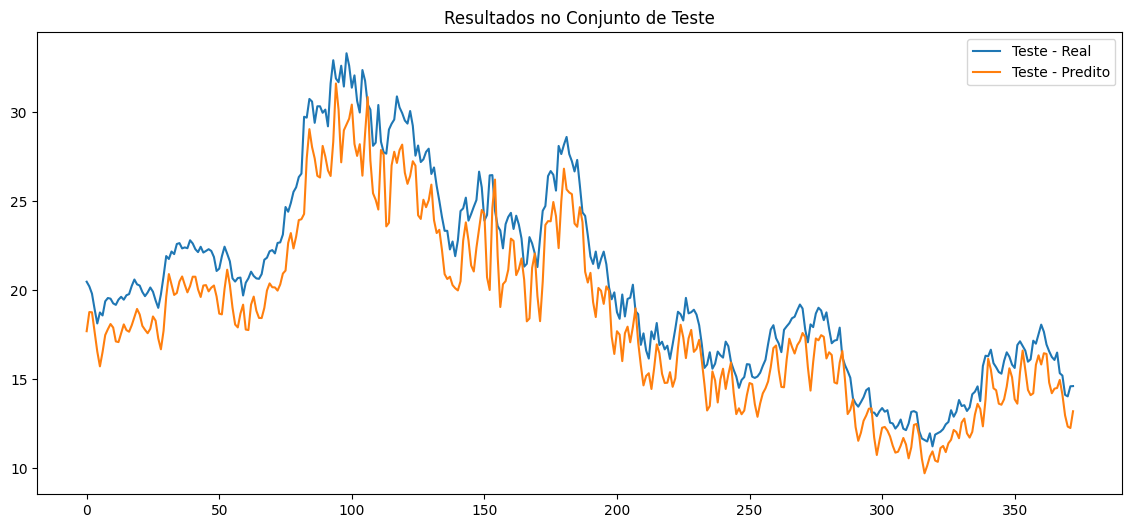

C:\Users\mateu\AppData\Local\Temp\ipykernel_14204\1900230545.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['Price'].resample('M').mean()


ValueError: shapes (55,5,1) and (5,) not aligned: 1 (dim 2) != 5 (dim 0)

In [106]:
# Etapa 4: Previsão e Visualização dos Resultados
# Função para prever valores
def predict(weights, X):
    return np.dot(X, weights)



# Gráficos de resultados para treino e teste
plt.figure(figsize=(14, 6))
plt.plot(range(len(y_train)), y_train, label='Treino - Real')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Treino - Predito')
plt.legend()
plt.title('Resultados no Conjunto de Treino')
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test, label='Teste - Real')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Teste - Predito')
plt.legend()
plt.title('Resultados no Conjunto de Teste')
plt.show()

# Etapa 5: Ajuste e Análise para Diferentes Escalas de Tempo (semanal e mensal)
# Alterar a frequência dos dados
data_weekly = data['Price'].resample('W').mean()
data_monthly = data['Price'].resample('M').mean()

# Função para treinar e prever em escalas diferentes
def train_and_predict(data, title):
    X, y = create_dataset(data.values, window_size)
    weights = np.random.randn(window_size)
    for epoch in range(epochs):
        grads = gradient(weights, X, y)
        weights -= learning_rate * grads
    y_pred = predict(weights, X)
    
    # Visualização
    plt.figure(figsize=(14, 6))
    plt.plot(range(len(y)), y, label=f'{title} - Real')
    plt.plot(range(len(y_pred)), y_pred, label=f'{title} - Predito')
    plt.legend()
    plt.title(f'Resultados na Escala de {title}')
    plt.show()


train_and_predict(data_monthly, 'Mensal')